In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['class'] = data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

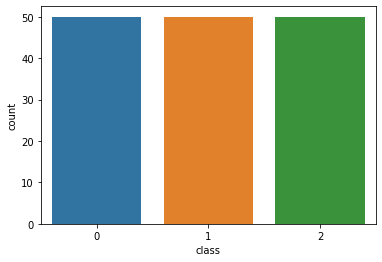

In [9]:
sns.countplot(df['class'],data=df)

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [11]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [12]:
x= df.drop('class',axis=1)
y= df['class']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=21)

In [14]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

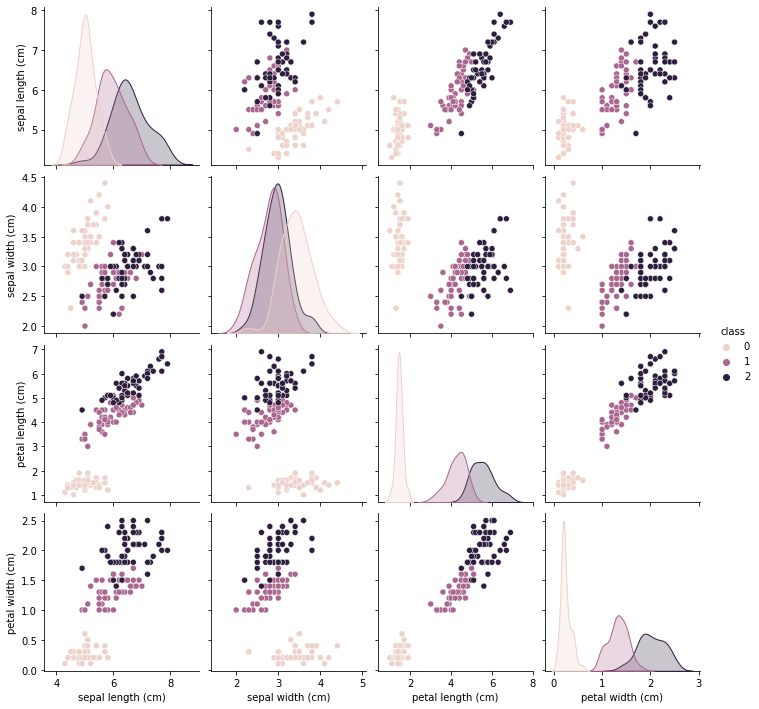

In [15]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [16]:
cor = df.corr()

<AxesSubplot:>

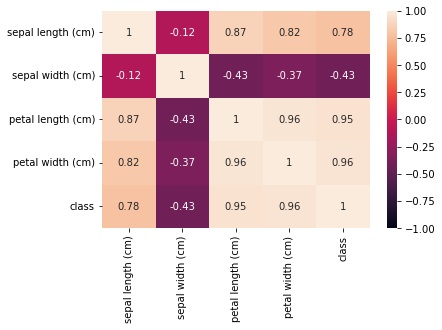

In [17]:
sns.heatmap(cor,vmin=-1,vmax=1,annot=True)

In [18]:
import statsmodels.formula.api as smf

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=4)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [25]:
y_pred = knn.predict(x_test)

In [26]:
from sklearn.metrics import classification_report , accuracy_score

In [27]:
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [29]:
from sklearn.model_selection import cross_val_score

In [32]:
accuracy_rate = []
for i in range(1,40):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn1,x_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [33]:
error_rate = []
for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,x_train,y_train,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

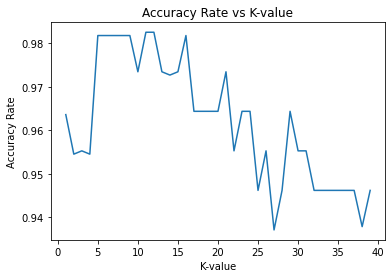

In [36]:
plt.plot(range(1,40),accuracy_rate)
plt.title('Accuracy Rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

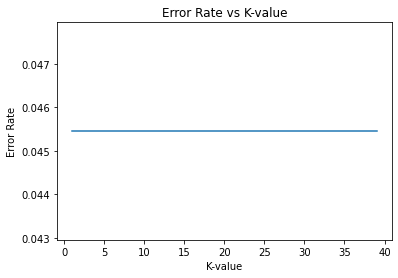

In [37]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dtc.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.9210526315789473

In [43]:
y_pred_train = dtc.predict(x_train)
accuracy_score(y_train,y_pred_train)

1.0

In [51]:
#Pruning
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=2)
dtc1.fit(x_train,y_train)
y_pred1=dtc1.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred1)

0.8421052631578947

In [53]:
y_pred_train1 = dtc1.predict(x_train)

In [58]:
accuracy_score(y_train,y_pred_train1)

0.9821428571428571

In [62]:
accuracy_rate1 = []
for i in range(1,20):
    dtc2 = DecisionTreeClassifier(max_depth=i)
    dtc2.fit(x_train,y_train)
    y_pred2=dtc2.predict(x_test)
    acc=accuracy_score(y_test,y_pred2)
    accuracy_rate1.append(acc)

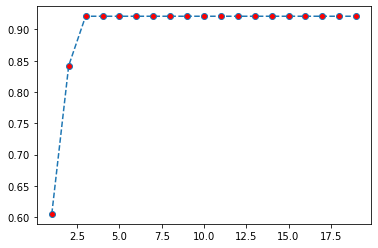

In [63]:
plt.plot(range(1,20),accuracy_rate1,marker='o',markerfacecolor='red',linestyle='dashed')

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc3 = DecisionTreeClassifier(max_depth=3)
dtc3.fit(x_train,y_train)
y_pred3=dtc3.predict(x_test)
accuracy_score(y_test,y_pred3)

0.9210526315789473

In [68]:
y_pred3_t=dtc3.predict(x_train)
accuracy_score(y_train,y_pred3_t)

1.0